In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customer = pd.read_csv('Data/Customers.csv')
product = pd.read_csv('Data/Products.csv')
transaction = pd.read_csv('Data/Transactions.csv')

customer.info() 
customer.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [16]:
transaction.info()
transaction.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [17]:
product.info()
product.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [18]:
# Merging datasets for detailed analysis
merge_data = pd.merge(transaction, product, on="ProductID", how="left")
df = pd.merge(merge_data, customer, on="CustomerID", how="left")

df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Timothy Perez,Europe,2022-03-15


In [29]:
# Checking for null values
df.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
ProductName        0
Category           0
Price_y            0
CustomerName       0
Region             0
SignupDate         0
dtype: int64

In [19]:
# Checking how many rows and columns
df.shape

(1000, 13)

In [20]:
# Checking the Datatype of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   ProductName      1000 non-null   object 
 8   Category         1000 non-null   object 
 9   Price_y          1000 non-null   float64
 10  CustomerName     1000 non-null   object 
 11  Region           1000 non-null   object 
 12  SignupDate       1000 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB


In [21]:
# Uderstanding the Dataset
df.describe()

,Quantity,TotalValue,Price_x,Price_y
count,1000.000000,1000.000000,1000.00000,1000.00000
mean,2.537000,689.995560,272.55407,272.55407
std,1.117981,493.144478,140.73639,140.73639
min,1.000000,16.080000,16.08000,16.08000
25%,2.000000,295.295000,147.95000,147.95000
50%,3.000000,588.880000,299.93000,299.93000
75%,4.000000,1011.660000,404.40000,404.40000
max,4.000000,1991.040000,497.76000,497.76000


Category
Books          681
Home Decor     639
Electronics    627
Clothing       590
Name: Quantity, dtype: int64

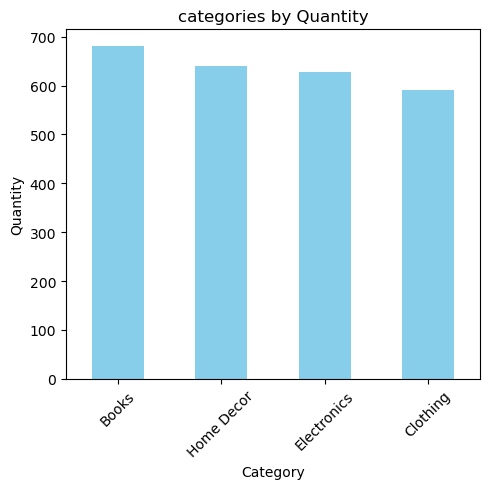

In [22]:
# Identifying the prodcut category's sold quantity
top_category = df.groupby('Category')['Quantity'].sum().sort_values(ascending = False)

plt.figure(figsize=(5, 5))
top_category.plot(kind='bar', color='skyblue')
plt.title('categories by Quantity')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
top_category
# Books Category has higher sold quanity and followed by Home decor, Electronnics and Clothing

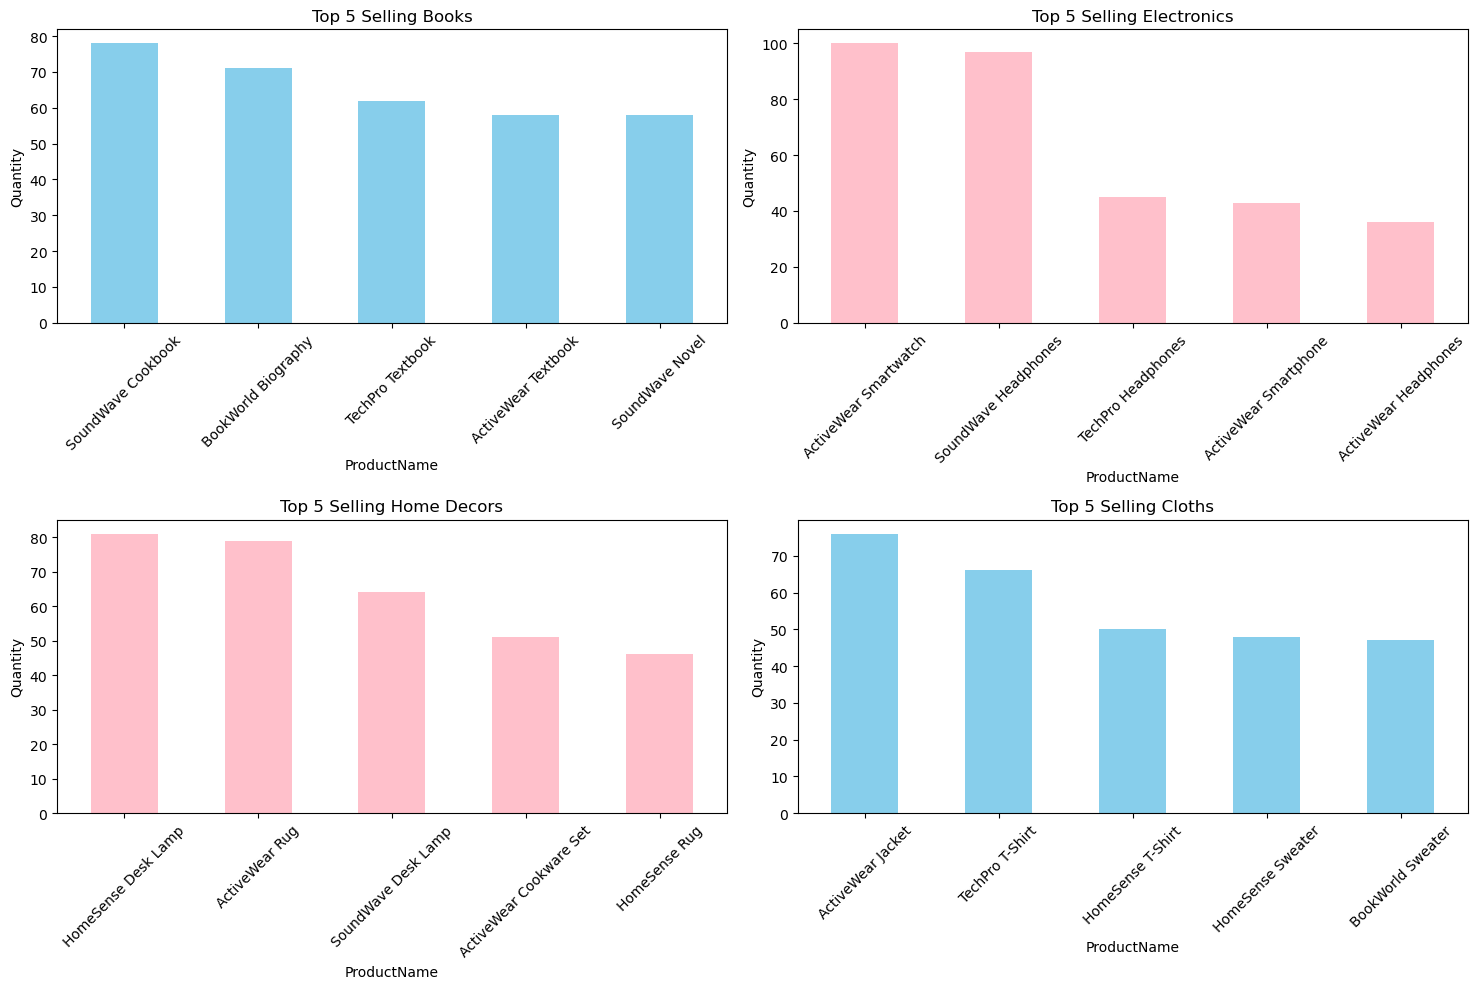

In [59]:
# Product Analysis

# Visualization Size
plt.figure(figsize=(15, 10))

# Top 5 Selling Books
Books = df['Category'] == 'Books'
book = df.loc[Books].groupby('ProductName')['Quantity'].sum().nlargest(5).sort_values(ascending = False)

plt.subplot(2,2,1)
book.plot(kind='bar', color='skyblue')
plt.title('Top 5 Selling Books')
plt.ylabel('Quantity')
plt.xticks(rotation=45)

#Top 5 selling Electronics
Electronics = df['Category'] == 'Electronics'
electronics = df.loc[Electronics].groupby('ProductName')['Quantity'].sum().nlargest(5).sort_values(ascending = False)

plt.subplot(2,2,2)
electronics.plot(kind='bar', color='pink')
plt.title('Top 5 Selling Electronics')
plt.ylabel('Quantity')
plt.xticks(rotation=45)

# Top 5 selling Home Decors
Home_Decor = df['Category'] == 'Home Decor'
Home_Decor = df.loc[Home_Decor].groupby('ProductName')['Quantity'].sum().nlargest(5).sort_values(ascending = False)

plt.subplot(2,2,3)
Home_Decor.plot(kind='bar', color='pink')
plt.title('Top 5 Selling Home Decors')
plt.ylabel('Quantity')
plt.xticks(rotation=45)

#Top 5 selling Cloths
Clothings = df['Category'] == 'Clothing'
Clothings = df.loc[Clothings].groupby('ProductName')['Quantity'].sum().nlargest(5).sort_values(ascending = False)

plt.subplot(2,2,4)
Clothings.plot(kind='bar', color='skyblue')
plt.title('Top 5 Selling Cloths')
plt.ylabel('Quantity')
plt.xticks(rotation=45)

plt.tight_layout()

# Soundwave Cookbook has higher sales than the other books.

# Activewear Smartwatch has higher sales than the other electronic products.

# Homesense Desk Lamp Has higher sales than the other Home Decor products.

# Activewear Jacket Has higher sales than the other Clothing products.

# Certain products are in high demand. For instance, the top 5 products contribute a significant portion of overall purchases.

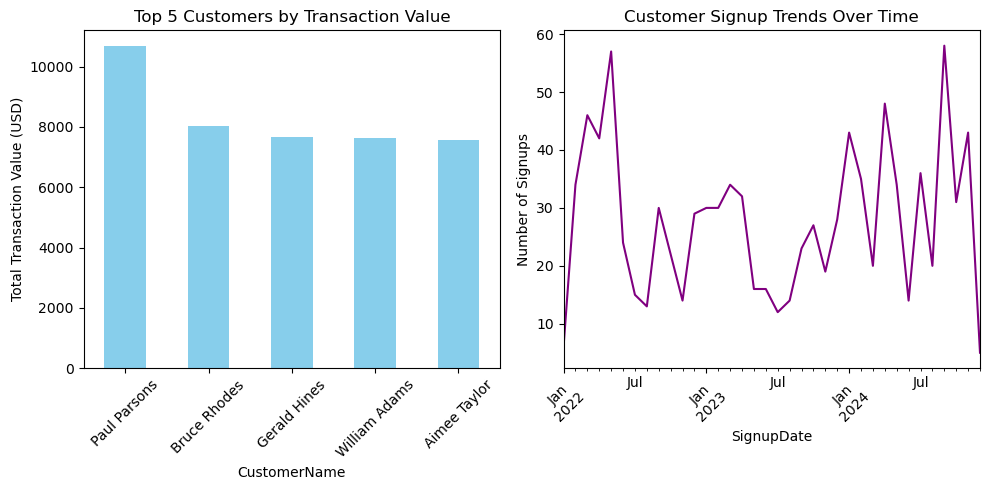

In [75]:
# Customer Analysis

#Converting dates to datetime for analysis
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['SignupDate'] = pd.to_datetime(df['SignupDate'])

#Visualization Size
plt.figure(figsize=(10, 5))

#Top 5 customers by total transaction value
top_customers = df.groupby('CustomerName')['TotalValue'].sum().nlargest(5)

plt.subplot(1, 2, 1)
top_customers.plot(kind='bar', color='skyblue')
plt.title('Top 5 Customers by Transaction Value')
plt.ylabel('Total Transaction Value (USD)')
plt.xticks(rotation=45)


#Signup trends over time (monthly)
signup_trends = df['SignupDate'].dt.to_period('M').value_counts().sort_index()

plt.subplot(1, 2, 2)
signup_trends.plot(color='purple')
plt.title('Customer Signup Trends Over Time')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)

plt.tight_layout()

#The top 5 customers contribute significantly to the total sales. Identifying and retaining such high-value customers is critical.

#The signup trend indicates peaks during certain months. These patterns can be leveraged for targeted campaigns during high-signup periods.

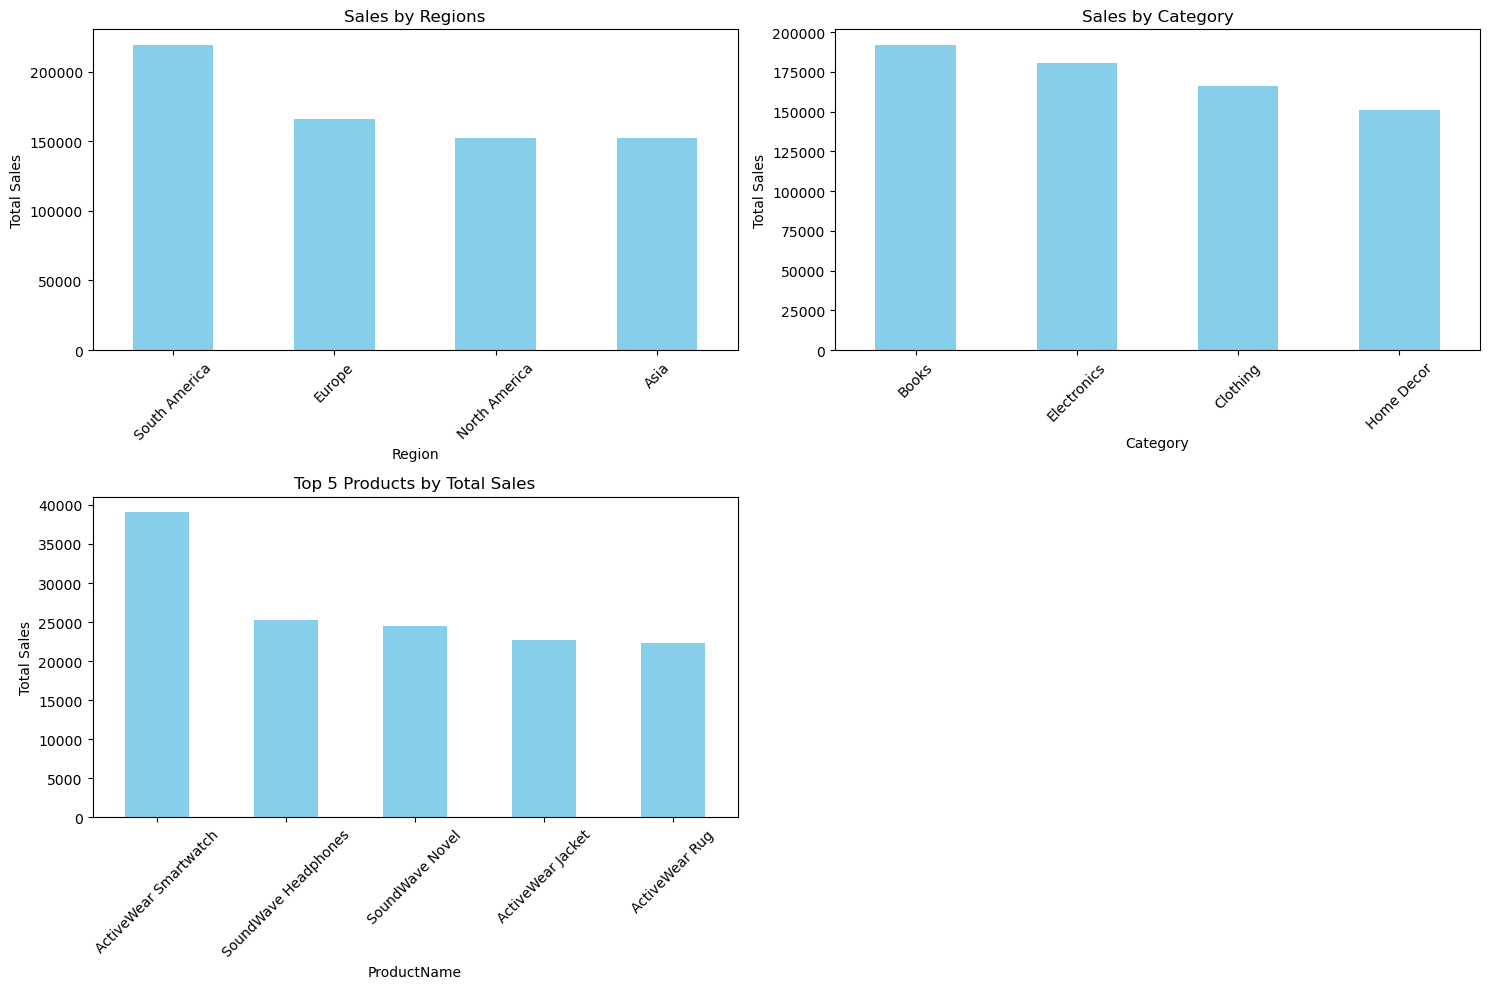

In [55]:
# Sales Analysis

#Visualization size
plt.figure(figsize=(15, 10))

# Visualising the sales by region 
top_region = df.groupby('Region')['TotalValue'].sum().sort_values(ascending = False)

plt.subplot(2, 2, 1)
top_region.plot(kind='bar', color='skyblue')
plt.title('Sales by Regions')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()

# Visualising the sales by Category 
top_category = df.groupby('Category')['TotalValue'].sum().sort_values(ascending = False)

plt.subplot(2, 2, 2)
top_category.plot(kind='bar', color='skyblue')
plt.title('Sales by Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()

# Visualising the sales by P 
top_Product = df.groupby('ProductName')['TotalValue'].sum().nlargest(5).sort_values(ascending = False)

plt.subplot(2, 2, 3)
top_Product.plot(kind='bar', color='skyblue')
plt.title('Top 5 Products by Total Sales')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()

#South America has higher sales than other regions.

# Books Category has higher sales and followed by Electronnics, Clothing and Home decor.

#The sales distribution across regions highlights specific regions with higher purchasing power. This can guide region-specific marketing strategies.

In [ ]:
#Key Business Insights:
#The top 5 customers contribute significantly to total sales, emphasizing the importance of retaining these high-value customers.
#The top 5 products account for a substantial portion of purchases, indicating a need to focus on inventory and marketing strategies for these products.
#Regional sales trends reveal regions with higher purchasing power, suggesting opportunities for region-specific marketing.
#Customer signup patterns indicate peak periods during specific months, which can guide promotional campaigns during those times.
#Overall, the dataset highlights actionable opportunities to optimize customer retention and inventory management.